In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from googleapiclient.discovery import build
from IPython.display import Image

In [2]:
YT_API_KEY = 'YT_API_KEY'

In [3]:
MINDYOURDECISIONS = ['UCHnj59g7jezwTy5GeL8EA_g', 'MindYourDecisions']
BLACKPENREDPEN = ['UC_SvYP0k05UKiJ_2ndB02IA', 'blackpenredpen']
CHANNELS = [MINDYOURDECISIONS, BLACKPENREDPEN]

In [4]:
youtube = build('youtube','v3',developerKey=YT_API_KEY)

In [5]:
def get_thumbnail(channel_id):
    snippets = youtube.search().list(part="snippet", type="channel", q=channel_id).execute()
    
    return snippets['items'][0]['snippet']['thumbnails']['high']['url']

In [6]:
def basic_stats(channel_id):
    stats = youtube.channels().list(part="statistics", id=channel_id[0]).execute()

    df = pd.DataFrame({channel_id[1]: stats['items'][0]['statistics']})
    df = df.rename({'subscriberCount': 'Subscribers', 'videoCount': 'Videos', 'viewCount': 'Views'}, axis='rows')
    df = df.drop('hiddenSubscriberCount')
    
    return df

In [7]:
def basic_stats_combined(channels):
    df = pd.DataFrame()
    for channel in channels:
        stats = youtube.channels().list(part="statistics", id=channel[0]).execute()

        df[channel[1]] = stats['items'][0]['statistics'].values()
    df = df.rename({1: 'Subscribers', 3: 'Videos', 0: 'Views'}, axis='rows')
    df = df.drop(2)
    
    df = df.apply(pd.to_numeric)
    
    return df

In [8]:
df = basic_stats_combined(CHANNELS)

<h1 style=font-size:50px> Characterization </h1>

<h1> blackpen<font color='red'>redpen</font></h1>

This channel is about math for fun! Most of the topics will be calculus-based. Sometimes we will also investigate some weird equations and complex numbers! Blackpenredpen is a YouTube star and professor at Pierce College in Los Angeles, who runs a channel where he posts videos of himself solving mathematical problems, with a focus on calculus and solving integrals. He is known for having a number of characteristic catchphrases, such as "I don't like to be on the bottom; I like to be on top", when moving the imaginary unit number from the bottom to the top of a quotient expression.
The name of the channel comes from the colors he prefers for whiteboard markers in many of his videos, and as time went on and he progressed to more complex problems and other colored markers began to be necessitated, it became something of a running joke.


In [9]:
Image(url= get_thumbnail(BLACKPENREDPEN[0]), width=400, height=400)

In [10]:
basic_stats(BLACKPENREDPEN)

,blackpenredpen
Subscribers,806000
Videos,2388
Views,124560419


<h1> MindYourDecisions </h1>

He run the MindYourDecisions channel on YouTube, which has over 1 million subscribers and 200 million views. He is also the author of The Joy of Game Theory: An Introduction to Strategic Thinking, and several other books which are available on Amazon. By way of history, He started the Mind Your Decisions blog back in 2007 to share a bit of math, personal finance, personal thoughts, and game theory. It's been quite a journey! He studied Economics and Mathematics at Stanford University.

In [11]:
Image(url= get_thumbnail(MINDYOURDECISIONS[0]), width=400, height=400)

In [12]:
basic_stats(MINDYOURDECISIONS)

,MindYourDecisions
Subscribers,2520000
Videos,651
Views,355292414


# Comparision

In [13]:
df = basic_stats_combined(CHANNELS)
df

,MindYourDecisions,blackpenredpen
Views,355292414,124560419
Subscribers,2520000,806000
Videos,651,2388


# Next

In [14]:
content = youtube.channels().list(id=MINDYOURDECISIONS, part='contentDetails').execute()

In [15]:
content

{'kind': 'youtube#channelListResponse',
 'etag': 'Wbk5sGk4GNRtlf_DeFGzL0-Fkvk',
 'pageInfo': {'totalResults': 1, 'resultsPerPage': 5},
 'items': [{'kind': 'youtube#channel',
   'etag': 'vvf4k8gdAqXiulnVHJFfEbPcvKE',
   'id': 'UCHnj59g7jezwTy5GeL8EA_g',
   'contentDetails': {'relatedPlaylists': {'likes': '',
     'uploads': 'UUHnj59g7jezwTy5GeL8EA_g'}}}]}

In [16]:
content['items'][0]['contentDetails']['relatedPlaylists']

{'likes': '', 'uploads': 'UUHnj59g7jezwTy5GeL8EA_g'}

In [17]:
UploadId = content['items'][0]['contentDetails']['relatedPlaylists']['uploads']

In [18]:
UploadId

'UUHnj59g7jezwTy5GeL8EA_g'

In [19]:
allVideos = []
nextPage_token=None

In [20]:
while 1:
    res = youtube.playlistItems().list(playlistId=UploadId,maxResults=50,part="snippet",pageToken=nextPage_token).execute()
    allVideos +=res["items"]
    nextPage_token = res.get("nextPageToken")#"prevPageToken"
    if nextPage_token is None:
        break
print(allVideos)

[{'kind': 'youtube#playlistItem', 'etag': '8u-OychoZ_DVQMbto7f9E-sK9y8', 'id': 'VVVIbmo1OWc3amV6d1R5NUdlTDhFQV9nLmE5dTFwanNmSkRz', 'snippet': {'publishedAt': '2021-09-23T07:23:40Z', 'channelId': 'UCHnj59g7jezwTy5GeL8EA_g', 'title': 'A nice chord problem from Bangladesh!', 'description': 'This problem is adapted from the 2021 Bangladesh Mathematical Olympiad (BDMO). I thank Mumtahina for the suggestion!\n\nSubscribe: https://www.youtube.com/user/MindYourDecisions?sub_confirmation=1\n\nSend me suggestions by email (address at end of many videos). I may not reply but I do consider all ideas!\n\nIf you buy from the links below I may receive a commission for sales. (As an Amazon Associate I earn from qualifying purchases.) This has no effect on the price for you.\n\nBook ratings are from June 2021.\n\nMy Books (worldwide links)\nhttps://mindyourdecisions.com/blog/my-books/#worldwide\n\nMy Books (US links)\nMind Your Decisions: Five Book Compilation\nhttps://amzn.to/2pbJ4wR\nA collection of 

In [21]:
allVideos[0]

{'kind': 'youtube#playlistItem',
 'etag': '8u-OychoZ_DVQMbto7f9E-sK9y8',
 'id': 'VVVIbmo1OWc3amV6d1R5NUdlTDhFQV9nLmE5dTFwanNmSkRz',
 'snippet': {'publishedAt': '2021-09-23T07:23:40Z',
  'channelId': 'UCHnj59g7jezwTy5GeL8EA_g',
  'title': 'A nice chord problem from Bangladesh!',
  'description': 'This problem is adapted from the 2021 Bangladesh Mathematical Olympiad (BDMO). I thank Mumtahina for the suggestion!\n\nSubscribe: https://www.youtube.com/user/MindYourDecisions?sub_confirmation=1\n\nSend me suggestions by email (address at end of many videos). I may not reply but I do consider all ideas!\n\nIf you buy from the links below I may receive a commission for sales. (As an Amazon Associate I earn from qualifying purchases.) This has no effect on the price for you.\n\nBook ratings are from June 2021.\n\nMy Books (worldwide links)\nhttps://mindyourdecisions.com/blog/my-books/#worldwide\n\nMy Books (US links)\nMind Your Decisions: Five Book Compilation\nhttps://amzn.to/2pbJ4wR\nA collec

In [22]:
video_ids = list(map(lambda x:x["snippet"]["resourceId"]["videoId"],allVideos))

In [23]:
len(video_ids)

651

In [24]:
stats = []
for i in range(0,len(video_ids),40):
    res=youtube.videos().list(id=",".join(video_ids[i:i+40]),part="statistics").execute()
    stats+=res["items"]

In [25]:
len(stats)

651

In [26]:
stats[0]

{'kind': 'youtube#video',
 'etag': 'QZX8XZaQq6IOF6HTFFtMk92UNeA',
 'id': 'a9u1pjsfJDs',
 'statistics': {'viewCount': '73698',
  'likeCount': '4051',
  'dislikeCount': '45',
  'favoriteCount': '0',
  'commentCount': '525'}}

In [27]:
title = []
liked =[]
disliked =[]
views =[]
url =[]
comment =[]
videoid =[]
publishedDate=[]
video_description=[]

In [28]:
for i in range(len(video_ids)):
    title.append((allVideos[i])["snippet"]["title"])
    publishedDate.append((allVideos[i])["snippet"]["publishedAt"])
    video_description.append((allVideos[i])["snippet"]["description"])
    liked.append((stats[i])["statistics"]["likeCount"])
    disliked.append((stats[i])["statistics"]["dislikeCount"])
    views.append((stats[i])["statistics"]["viewCount"])
    comment.append((stats[i])["statistics"]["commentCount"])
    videoid.append((allVideos[i])["snippet"]["resourceId"]["videoId"])

In [29]:
data={"title":title,"liked":liked,"disliked":disliked,"views":views,"comment":comment,"videoid":videoid,"publishedDate":publishedDate,"video_description":video_description}

In [30]:
df=pd.DataFrame(data)

In [31]:
df

,title,liked,disliked,views,comment,videoid,publishedDate,video_description
0,A nice chord problem from Bangladesh!,4051,45,73698,525,a9u1pjsfJDs,2021-09-23T07:23:40Z,This problem is adapted from the 2021 Banglade...
1,Can you solve this tricky sum from Indonesia?,5752,76,116472,447,VO4QElbHv-0,2021-09-15T00:46:52Z,This one stumped me at first. Can you figure i...
2,Legendary time Albert Einstein gave homework help,6449,116,157492,400,bwHnXQ0cygg,2021-09-08T00:56:18Z,Imagine being stuck on a math problem and then...
3,Test so hard that students cried - Helen and I...,4415,187,164033,623,aqPnuvrm4go,2021-10-12T00:18:33Z,This is a tricky question from Singapore's PSL...
4,A beautiful formula - 'Cause I'm real,3572,229,114421,198,chUlt9CX1oE,2021-10-08T08:30:18Z,The imaginary number i is equal to the square ...
...,...,...,...,...,...,...,...,...
646,How Game Theory Solved a Religious Mystery,1850,618,199584,525,f4dA4BTv7KQ,2014-02-07T01:57:02Z,A man dies leaving insufficient funds for debt...
647,How to Win at Sports Betting Guaranteed,879,436,228968,165,4GSV6-5Rt-I,2014-01-24T21:39:52Z,"This video is only to highlight math, I don't ..."
648,Math Puzzle: Area of a Triangle,2999,94,161306,304,lWIBk2DZszQ,2013-12-23T00:29:38Z,"A right triangle has a hypotenuse of 3, and on..."
649,Proving pi is irrational (using high school le...,2208,256,218700,332,PgKmstECld0,2013-11-08T05:21:52Z,I did make one big typo/mistake in the video: ...


In [32]:
df["liked"]=df["liked"].astype("int")
df["disliked"]=df["disliked"].astype("int")
df["comment"]=df["comment"].astype("int")
df["publishedDate"] = df["publishedDate"].astype('datetime64[ns]')

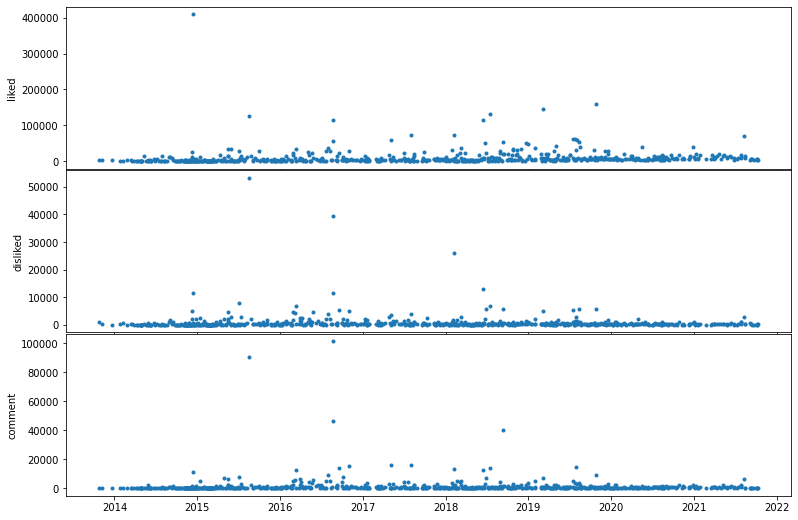

In [33]:
fig = plt.figure(figsize=(13,9))
fig.subplots_adjust(hspace=0.01,wspace=0.01)

ylabels = ['liked', 'disliked', 'comment']
n_row = len(ylabels)
n_col = 1
for count, ylabel in enumerate(ylabels):
    ax = fig.add_subplot(n_row,n_col,count+1)
    ax.plot(df["publishedDate"],df[ylabel],'.')
    ax.set_ylabel(ylabel)
plt.show()

In [34]:
youtube.videos().list(id=','.join(['aqPnuvrm4go']),part="statistics").execute()

{'kind': 'youtube#videoListResponse',
 'etag': 'YhehSts70VyrnXO48XL3ImhIcwo',
 'items': [{'kind': 'youtube#video',
   'etag': '4PKZcson_g-m0kk7kK7Ed9z9XIo',
   'id': 'aqPnuvrm4go',
   'statistics': {'viewCount': '164033',
    'likeCount': '4415',
    'dislikeCount': '187',
    'favoriteCount': '0',
    'commentCount': '623'}}],
 'pageInfo': {'totalResults': 1, 'resultsPerPage': 1}}

In [35]:
video_id ='aqPnuvrm4go'
kwargs = {"part":'snippet', "videoId":video_id, "textFormat":'plainText'}
results  = youtube.commentThreads().list(**kwargs).execute()

In [36]:
comments = []
while results:
    for item in results['items']:
        comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
        comments.append(comment)

    if 'nextPageToken' in results:
        kwargs['pageToken'] = results['nextPageToken']
        results = youtube.commentThreads().list(**kwargs).execute()
    else:
        break

In [37]:
comments

['displaying all the information as algebra makes the problem very easy and satisfying. Very proud that I got the right answer!',
 'The biggest problem in this video was how “Ivan” is pronounced 😂',
 'Part 1 of the question:\nWhy don’t they have a credit card when they need to carry so much money?\n\nPart 2 of the question:\nwho measures the weight of money?',
 'At first i got happy that i solved a hard question. Then i realized it was for 12 years old kids. 😂',
 'I end up with 1,665 376 kg',
 "Sure you know the number of coin it's strange to calculate with +40. it's just Helen got 20x64 + 50x104 and Yvan got the opposite 50x64 + 20x104 it's that simple (they have the same number in total). You have a nintresting way to calculate but it's look so twisted for me... with my fist explaination you have the total number of coin for each then 168 coin each. 104x2.7 (with significant number it's 281g) then (1134 -281) / 168 = mass of each coin. From here it's simple to finish, by the way than

In [38]:
len(comments)

324